In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# 读取 CSV 文件
df_EX = pd.read_csv("./EX/spatial.csv", skip_blank_lines=False)
df_CO = pd.read_csv("./CO/spatial.csv", skip_blank_lines=False)

# 找到空行的索引
blank_line_indices_ex = df_EX.index[df_EX.isnull().all(1)]
blank_line_indices_co = df_CO.index[df_CO.isnull().all(1)]

# 初始化三个空的 DataFrame
dataframes_ex = []
start_idx_ex = 0

dataframes_co = []
start_idx_co = 0


# 根据空行的索引将数据分割成三个 DataFrame
for idx in blank_line_indices_ex:
    dataframes_ex.append(df_EX.iloc[start_idx_ex:idx])
    start_idx_ex = idx + 1

for idx in blank_line_indices_co:
    dataframes_co.append(df_CO.iloc[start_idx_co:idx])
    start_idx_co = idx + 1
    
# 处理最后一个部分（如果有剩余的数据）
if start_idx_ex < len(df_EX):
    dataframes_ex.append(df_EX.iloc[start_idx_ex:])
if start_idx_co < len(df_CO):
    dataframes_co.append(df_CO.iloc[start_idx_co:])
print(len(dataframes_ex))
print(len(dataframes_co))

3
3


In [2]:
print("STATS for experiment units: ")
for idx, df in enumerate(dataframes_ex):
    # 根据 "type" 列进行分组
    df["TYPE"].astype(int)
    df["TYPE"].astype(str)

    grouped = df.groupby("TYPE")
    
    # 提取列名为 "1~12" 的列
    columns_to_average = [str(i) for i in range(1, 13)]

    # 计算每个分组中 "1~12" 列的平均值
    averages = grouped[columns_to_average].mean().mean(axis=1)
    print("BLOCK ", idx + 1)
    print(averages)
columns_to_average = [str(i) for i in range(1, 13)]
merged_df_ex = pd.concat(dataframes_ex, ignore_index=True)
grouped_ex = merged_df_ex.groupby("TYPE")
avg_frame_ex = grouped_ex[columns_to_average].mean()
avg_ex = avg_frame_ex.mean(axis=1)
print("Overall avg: ")
print(avg_ex)

STATS for experiment units: 
BLOCK  1
TYPE
0.0    0.890351
1.0    0.263889
dtype: float64
BLOCK  2
TYPE
0.0    0.595238
1.0    0.839286
dtype: float64
BLOCK  3
TYPE
0.0    0.833333
1.0    0.718750
dtype: float64
Overall avg: 
TYPE
0.0    0.814516
1.0    0.607843
dtype: float64


In [3]:
print("STATS for control units: ")
for idx, df in enumerate(dataframes_co):
    # 根据 "type" 列进行分组
    df["TYPE"] = df["TYPE"].astype(int)
    df["TYPE"] = df["TYPE"].astype(str)
    grouped = df.groupby("TYPE")
    # 提取列名为 "1~12" 的列
    columns_to_average = [str(i) for i in range(1, 11)]
    print("BLOCK ", idx + 1)
    # 计算每个分组中 "1~12" 列的平均值
    averages = grouped[columns_to_average].mean().mean(axis=1)
    print(averages)
columns_to_average = [str(i) for i in range(1, 11)]
merged_df_co = pd.concat(dataframes_co, ignore_index=True)
grouped_co = merged_df_co.groupby("TYPE")
avg_frame_co = grouped_co[columns_to_average].mean()
avg_co = avg_frame_co.mean(axis=1)
print("Overall avg: ")
print(avg_co)

STATS for control units: 
BLOCK  1
TYPE
0    0.10
1    0.05
dtype: float64
BLOCK  2
TYPE
0    0.214286
1    0.278571
dtype: float64
BLOCK  3
TYPE
0    0.320
1    0.225
dtype: float64
Overall avg: 
TYPE
0    0.161290
1    0.185294
dtype: float64


<ipython-input-3-26b4cd3a5818>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TYPE"] = df["TYPE"].astype(int)
<ipython-input-3-26b4cd3a5818>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TYPE"] = df["TYPE"].astype(str)
<ipython-input-3-26b4cd3a5818>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

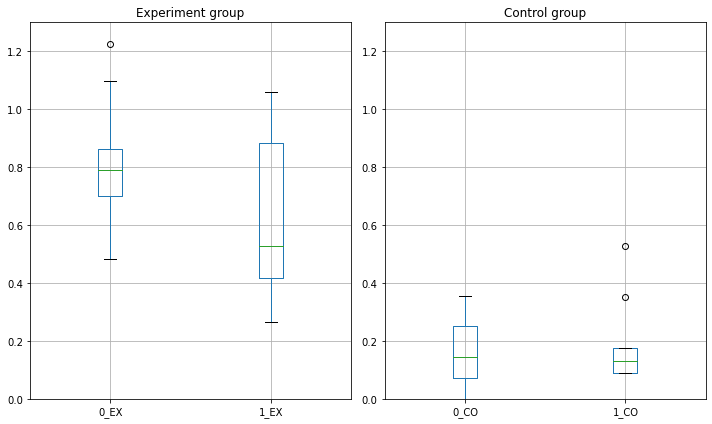

In [4]:
avg_frame_ex.index = avg_frame_ex.index.map(lambda x: str(int(x)) + "_EX")
avg_frame_co.index = avg_frame_co.index.map(lambda x: str(int(x)) + "_CO")
avg_frame_ex = avg_frame_ex.T
avg_frame_co = avg_frame_co.T

# 绘制箱线图
plt.figure(figsize=(10, 6))

# 绘制 frame1 的箱线图
plt.subplot(1, 2, 1)
avg_frame_ex.boxplot()
plt.ylim(0, 1.3)
plt.title("Experiment group")

# 绘制 frame2 的箱线图
plt.subplot(1, 2, 2)
avg_frame_co.boxplot()
plt.ylim(0, 1.3)
plt.title("Control group")

plt.tight_layout()
plt.show()

In [6]:


import numpy as np
from scipy.stats import levene, bartlett

# 假设你有多个样本组，存储在 sample1, sample2, sample3 等数组中

# 进行方差齐性检验
# 使用 Levene's test
levene_test_statistic, levene_p_value = levene(avg_frame_co["0_CO"].tolist(), avg_frame_ex["0_EX"].tolist())

# 使用 Bartlett's test
bartlett_test_statistic, bartlett_p_value = bartlett(avg_frame_co["0_CO"].tolist(), avg_frame_ex["0_EX"].tolist())

# 打印检验结果
print("Levene's Test:")
print(f"Test Statistic: {levene_test_statistic}")
print(f"P-value: {levene_p_value}")
print()

print("Bartlett's Test:")
print(f"Test Statistic: {bartlett_test_statistic}")
print(f"P-value: {bartlett_p_value}")

Levene's Test:
Test Statistic: 0.9622976142799927
P-value: 0.3383271128259969

Bartlett's Test:
Test Statistic: 2.9588381449758563
P-value: 0.08540929283990445


In [7]:
import numpy as np
from scipy.stats import levene, bartlett

# 假设你有多个样本组，存储在 sample1, sample2, sample3 等数组中

# 进行方差齐性检验
# 使用 Levene's test
levene_test_statistic, levene_p_value = levene(avg_frame_co["1_CO"].tolist(), avg_frame_ex["1_EX"].tolist())

# 使用 Bartlett's test
bartlett_test_statistic, bartlett_p_value = bartlett(avg_frame_co["1_CO"].tolist(), avg_frame_ex["1_EX"].tolist())

# 打印检验结果
print("Levene's Test:")
print(f"Test Statistic: {levene_test_statistic}")
print(f"P-value: {levene_p_value}")
print()

print("Bartlett's Test:")
print(f"Test Statistic: {bartlett_test_statistic}")
print(f"P-value: {bartlett_p_value}")

Levene's Test:
Test Statistic: 3.998182750104841
P-value: 0.059318341925791954

Bartlett's Test:
Test Statistic: 3.524496815082986
P-value: 0.06046817728572198


In [8]:
import numpy as np
from scipy.stats import ttest_ind

# 假设你有两个独立的样本组，存储在 sample1 和 sample2 中

# 执行独立样本 t 检验
t_statistic, p_value = ttest_ind(avg_frame_co["0_CO"].tolist(), avg_frame_ex["0_EX"].tolist())

# 打印检验结果
print("Independent Samples t-test:")
print(f"t-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# 根据 P 值判断是否存在显著差异
alpha = 0.05  # 显著性水平
if p_value < alpha:
    print("存在显著差异")
else:
    print("不存在显著差异")

Independent Samples t-test:
t-statistic: -9.237407199396378
P-value: 1.180307601426191e-08
存在显著差异


In [9]:
from scipy.stats import mannwhitneyu

# 假设你有两个独立的样本组，存储在 sample1 和 sample2 中

# 执行 Mann-Whitney U 检验
statistic, p_value = mannwhitneyu(avg_frame_co["1_CO"].tolist(), avg_frame_ex["1_EX"].tolist(), alternative='two-sided')

# 打印检验结果
print("Mann-Whitney U Test:")
print(f"Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# 根据 P 值判断是否存在显著差异
alpha = 0.05  # 显著性水平
if p_value < alpha:
    print("存在显著差异")
else:
    print("不存在显著差异")

Mann-Whitney U Test:
Test Statistic: 8.5
P-value: 0.0006897033869635907
存在显著差异
